In [1]:
#IMPORT THE LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import haversine as hs

In [2]:
#READ THE CSV FILE WHERE THE DATA IS STORED
hurtos = pd.read_csv('../data/hurtosModified.csv')
hurtos

,ANIO,FECHA,BARRIO,COMUNA,LATITUDE,LONGITUDE,SEXO,CONDUCTA
0,2019,2019/01/01,La Francia,2 Santa Cruz,6.299099,-75.549699,Hombre,Hurto de moto
1,2019,2019/01/01,Barrios de Jesús,9 Buenos Aires,6.229984,-75.536171,Hombre,Hurto de moto
2,2019,2019/01/01,Brasilia,4 Aranjuez,6.278219,-75.557155,Mujer,Hurto de moto
3,2019,2019/01/01,Florencia,5 Castilla,6.309709,-75.566950,Mujer,Hurto de moto
4,2019,2019/01/01,Boston,10 La Candelaria,6.248086,-75.554884,Mujer,Hurto de moto
...,...,...,...,...,...,...,...,...
69180,2020,2020/12/31,Florencia,5 Castilla,6.309353,-75.569646,Hombre,Hurto a persona
69181,2020,2020/12/31,Área Urbana Cgto. San Cristóbal,60 San Cristobal,6.279775,-75.632511,Hombre,Hurto a persona
69182,2020,2020/12/31,Popular,1 Popular,6.299898,-75.548174,Hombre,Hurto a persona
69183,2020,2020/12/31,Santa María de los Ángeles,14 El Poblado,6.189447,-75.580735,Hombre,Hurto a persona


In [3]:
#VISUALIZE THE COLUMNS AND RENAME ANIO COLUMN
hurtos = hurtos.rename({'ANIO':'AÑO'},axis=1)

In [4]:
#CONVERT LATITUDE AND LONGITUDE COLUMNS TO FLOAT VALUES
hurtos[['LATITUDE','LONGITUDE']] = hurtos[['LATITUDE','LONGITUDE']].astype(float)

In [5]:
#CONVERT SEX COLUMN VALUES TO ONE LETTER
hurtos['SEXO'] = hurtos['SEXO'].apply(lambda sexo: sexo[0])

In [6]:
#CONVERT STRING DATE TO PANDAS DATETIME OBJECT
hurtos['FECHA'] = pd.to_datetime(hurtos['FECHA'])

In [7]:
#DROP DUPLICATED VALUES
hurtos = hurtos.drop_duplicates()

In [78]:
#ROBBERIES PER COMMUNE
total_hurtos = hurtos['COMUNA'].value_counts()
total_hurtos

10 La Candelaria           18349
11 Laureles -  Estadio      7279
14 El Poblado               6693
16 Belen                    4758
4 Aranjuez                  4578
5 Castilla                  4100
7 Robledo                   3775
15 Guayabal                 3062
9 Buenos Aires              2806
12 La America               2698
8 Villa Hermosa             2375
3 Manrique                  1774
6 Doce de Octubre           1482
13 San Javier               1400
1 Popular                    984
60 San Cristobal             860
2 Santa Cruz                 748
80 San Antonio de Prado      574
90 Santa Elena               388
70 Altavista                 186
50 Palmitas                   30
Sin dato                       7
Name: COMUNA, dtype: int64

                     COMUNA  MEDIA  DESVIACION_ESTANDAR
0                 1 Popular   82.0                 67.0
1          10 La Candelaria  874.0               1300.0
2    11 Laureles -  Estadio  404.0                193.0
3             12 La America  208.0                121.0
4             13 San Javier   74.0                 51.0
5             14 El Poblado  304.0                256.0
6               15 Guayabal  340.0                195.0
7                  16 Belen  216.0                171.0
8              2 Santa Cruz   68.0                 31.0
9                3 Manrique  118.0                 98.0
10               4 Aranjuez  269.0                132.0
11               5 Castilla  228.0                166.0
12              50 Palmitas    4.0                  4.0
13        6 Doce de Octubre  124.0                 97.0
14         60 San Cristobal   43.0                 82.0
15                7 Robledo  145.0                 89.0
16             70 Altavista   19.0              

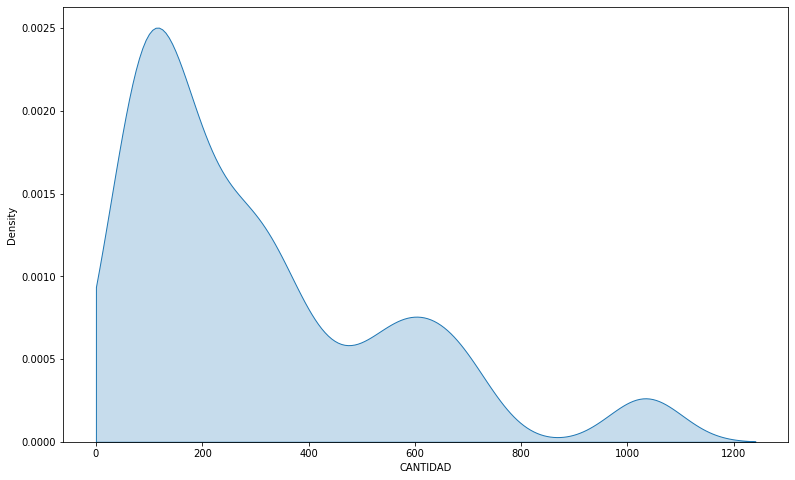

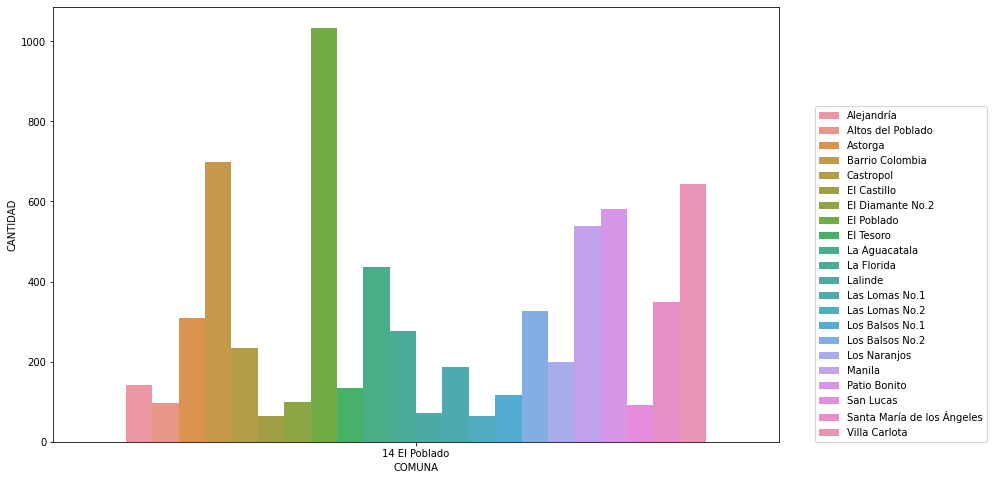

In [79]:
#TOTAL OF ROBBERIES PER NEIGHBORHOOD(ALL GROUPED BY COMMUNE)
hurtos_x_barrio = hurtos.groupby(['COMUNA','BARRIO']).size()
df=pd.DataFrame(hurtos_x_barrio).reset_index().rename({0:'CANTIDAD'},axis=1)
#GET AND SHOW MEAN AND STANDARD DEVIATION OF ROBBERIES PER NEIGHBORHOOD
print(round(df.groupby('COMUNA').agg(MEDIA=('CANTIDAD', 'mean'),DESVIACION_ESTANDAR=('CANTIDAD','std')).reset_index()))
#DISPLAY DATA (PROBABILITY DENSITY FUNCTION)
plt.figure(figsize=(13,8))
sns.kdeplot(data=df[df['COMUNA']=='14 El Poblado'],x='CANTIDAD',bw_adjust=0.5,clip=[0,1500],shade=True);
plt.figure(figsize=(13,8))
sns.barplot(data=df[df['COMUNA']=='14 El Poblado'],x='COMUNA',y='CANTIDAD',hue='BARRIO');
plt.legend(loc=(1.05,0));

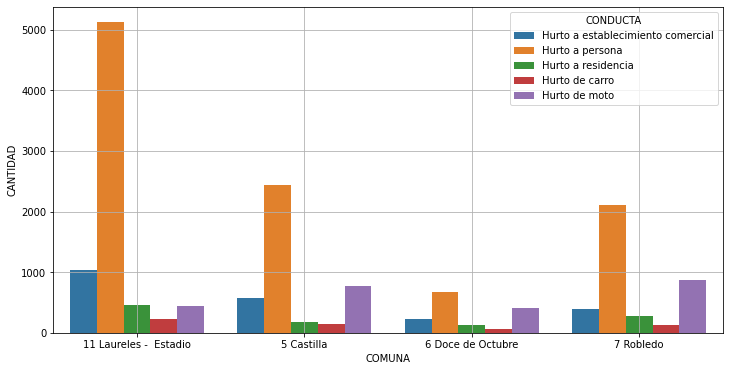

In [10]:
#TOTAL OF EACH ROBBERY KINDS PER COMMUNE
tipo_hurto_x_comuna = hurtos.groupby(['COMUNA','CONDUCTA']).size()
tipo_hurto_x_comuna = pd.DataFrame(tipo_hurto_x_comuna)
tipo_hurto_x_comuna = tipo_hurto_x_comuna.reset_index().rename({0:'CANTIDAD'},axis=1)
#SAMPLE OF THE DATASET TO PLOT
sample = tipo_hurto_x_comuna[tipo_hurto_x_comuna['COMUNA'].isin(['7 Robledo','5 Castilla','6 Doce de Octubre','11 Laureles -  Estadio'])]
#DISPLAY DATA (SIZE PER CATEGORY)
plt.figure(figsize=(12,6))
sns.barplot(data = sample, x='COMUNA', y='CANTIDAD',hue='CONDUCTA')
plt.grid()

In [11]:
#TOTAL OF EACH ROBBERY KINDS PER NEIGHBORHOOD (ALL GROUPED BY COMMUNE)
tipo_hurto_x_barrio = hurtos.groupby(['COMUNA','BARRIO','CONDUCTA']).size()

     CANTIDAD                                                  
        count   mean    std    min    25%    50%    75%     max
AÑO                                                            
2019     52.0  774.0   92.0  513.0  726.0  767.0  814.0  1075.0
2020     53.0  541.0  169.0  147.0  434.0  560.0  638.0   949.0


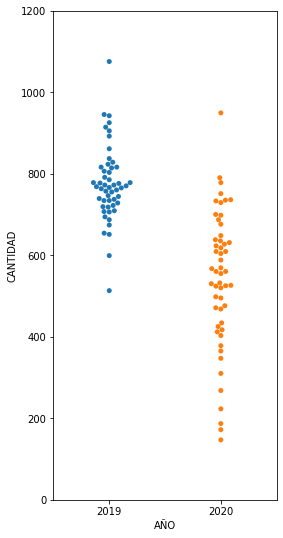

In [12]:
#CREATE COPY OF THE DATAFRAME
hurtos_copy = hurtos.copy()
#CREATE COLUMN FOR THE WEEKLY ROBBERIES QUANTITY
hurtos_copy['SEMANA_DEL_AÑO'] = hurtos_copy['FECHA'].dt.isocalendar().week
#CREATE DATAFRAME FOR THE QUANTITY OF THE THEFTS PER WEEK
hurtos_x_semana = pd.DataFrame(hurtos_copy.groupby(['AÑO','SEMANA_DEL_AÑO']).size()).reset_index().rename({0:'CANTIDAD'},axis=1)
#GET AND SHOW STATS OF THE WEEKLY THEFTS
print(round(hurtos_x_semana.groupby('AÑO').agg({'CANTIDAD':'describe'})))
#DISPLAY DATA 
plt.figure(figsize=(4,9))
plt.ylim(0,1200)
sns.swarmplot(data=hurtos_x_semana,x='AÑO',y='CANTIDAD');

     CANTIDAD                                                       
        count    mean    std     min     25%     50%     75%     max
AÑO                                                                 
2019     12.0  3354.0  349.0  2766.0  3183.0  3328.0  3610.0  3844.0
2020     12.0  2388.0  692.0   985.0  2048.0  2432.0  2701.0  3715.0


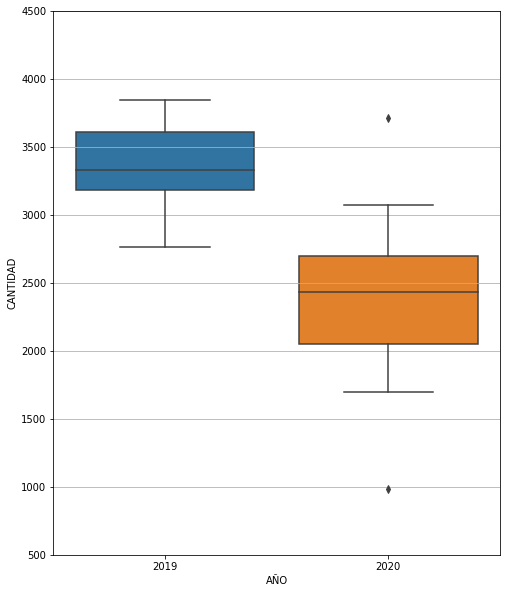

In [13]:
#CREATE COLUMN FOR THE ROBBERY'S MONTH
hurtos_copy['MES'] = hurtos_copy['FECHA'].dt.month_name()
#CREATE DATAFRAME FOR THE QUANTITTY OF ROBBERIES PER MONTH
hurtos_x_mes= pd.DataFrame(hurtos_copy.groupby(['AÑO','MES']).size()).reset_index().rename({0:'CANTIDAD'},axis=1)
#GET AND SHOW STATS OF THE MONTHLY ROBBERIES
print(round(hurtos_x_mes.groupby('AÑO').describe()))
#DISPLAY DATA (BOX PLOT OF THE DISTRIBUTION OF THE ROBBERIES MONTHLY)
plt.figure(figsize=(8,10))
plt.grid()
plt.ylim(500,4500)
sns.boxplot(data = hurtos_x_mes,x='AÑO',y='CANTIDAD');

CONDUCTA  Hurto a establecimiento comercial  Hurto a persona  \
count                                  53.0             53.0   
mean                                   82.0            330.0   
std                                    25.0            124.0   
min                                    28.0             75.0   
25%                                    69.0            242.0   
50%                                    80.0            342.0   
75%                                    93.0            405.0   
max                                   166.0            689.0   

CONDUCTA  Hurto a residencia  Hurto de carro  Hurto de moto  
count                   53.0            52.0           53.0  
mean                    32.0            18.0           80.0  
std                     10.0             6.0           23.0  
min                      3.0             2.0           24.0  
25%                     26.0            15.0           67.0  
50%                     34.0            18.0       

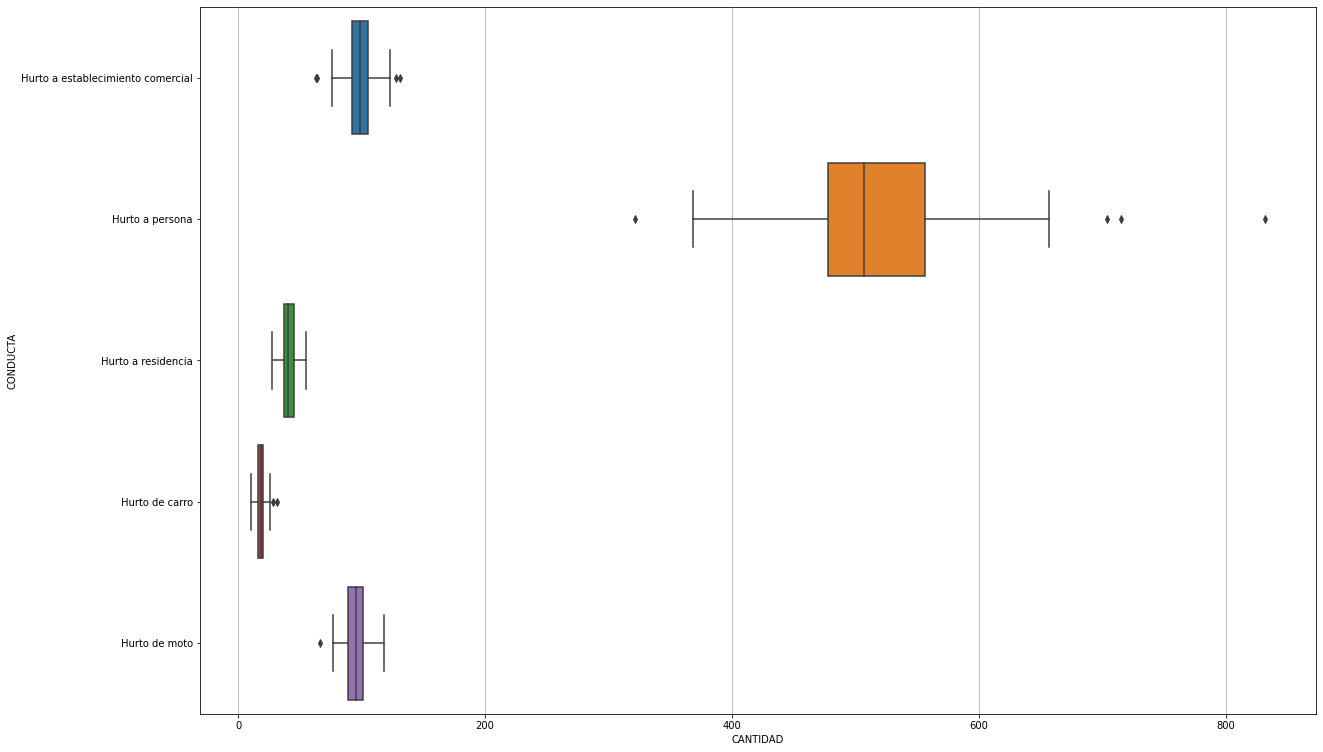

In [91]:
cant_tipo_hurtos_x_semana = hurtos_copy.groupby(['AÑO','SEMANA_DEL_AÑO','CONDUCTA']).size()
df = pd.DataFrame(cant_tipo_hurtos_x_semana).reset_index().rename({0:'CANTIDAD'},axis=1)
#SHOW TABLES OF THE WEEKLY ROBBERIES QUANTITIES
pivot_hurtos_x_semana = pd.pivot(data=df,index=['AÑO','SEMANA_DEL_AÑO'],columns='CONDUCTA',values='CANTIDAD')
#GET AND SHOW STATS OF THE WEEKLY ROBBERIES
print(round(pivot_hurtos_x_semana.loc[2020].describe()))
#DISPLAY DATA (AMOUNT OF TYPE OF ROBBERY PER WEEK)
plt.figure(figsize=(20,13))
plt.grid(which='major')
sns.boxplot(data=df[df['AÑO']==2019],y='CONDUCTA',x='CANTIDAD');

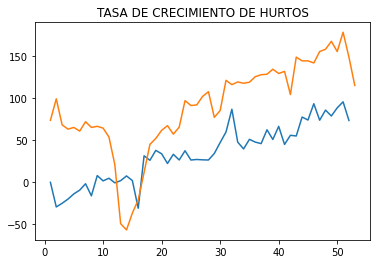

In [15]:
#GET GROWTH RATE OF EACH KIND OF ROBBERY PER WEEK
pivot_copy_HPS = pivot_hurtos_x_semana.copy()
pivot_copy_HPS = round(pivot_copy_HPS.pct_change(fill_method='ffill')*100,3)
pivot_copy_HPS = pivot_copy_HPS.fillna(0)
#WRITE IN EACH CELL THE GROWTH PERCENTAGE COMPARED TO PREVIOUS RECORDS
for i in range(1,len(pivot_copy_HPS)):
    pivot_copy_HPS.iloc[i]['Hurto a persona'] = pivot_copy_HPS.iloc[i-1]['Hurto a persona'] + pivot_copy_HPS.iloc[i]['Hurto a persona']
#DISPLAY GROWTH RATE GRAPHICS
plt.title('TASA DE CRECIMIENTO DE HURTOS')
plt.plot(pivot_copy_HPS.loc[2019]['Hurto a persona'].index,pivot_copy_HPS.loc[2019]['Hurto a persona'].values,label='2019')
plt.plot(pivot_copy_HPS.loc[2020]['Hurto a persona'].index,pivot_copy_HPS.loc[2020]['Hurto a persona'].values,label='2020');
